# QDAC-II multiple generators per channel


In [1]:
from time import sleep
import numpy
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.17'
qdac = QDAC2.QDac2('QDAC', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
from qcodes.instrument_drivers.rigol import RigolDS1074Z
rigol_addr = '192.168.8.199'
scope = RigolDS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Connected to: QDevil QDAC-II (serial:3, firmware:10-1.4) in 0.23s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.13s


In [2]:
scope.write('*rst')
qdac.reset()

In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
# Connect scope ch 3 to qdac ch 3
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.1')
scope.write('chan3:offs 0.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.05')
scope.write('tim:scal 2e-4')
scope.write('tim:offs 0')

In [5]:
channel = qdac.ch03
square = channel.square_wave()
sine = channel.sine_wave()
triangle = channel.triangle_wave()
scope.write('run')
qdac.start_all()

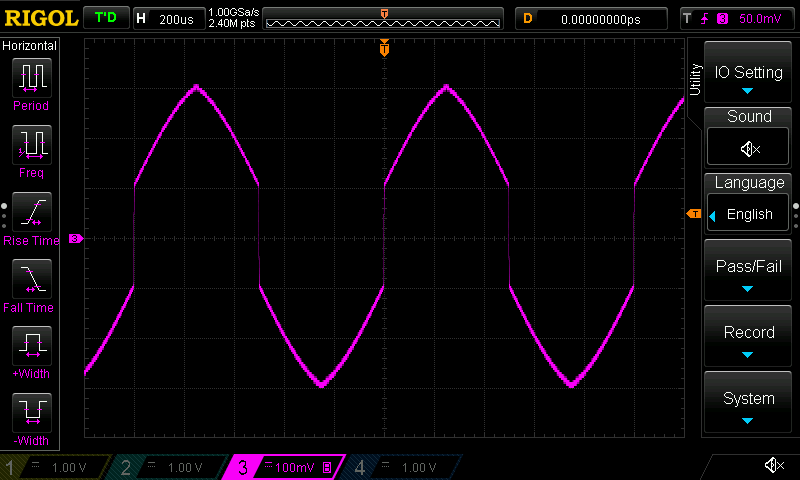

In [6]:
capture()

In [6]:
# Stop one of the waveforms
sine.abort()
sleep(3)
scope.write('run')

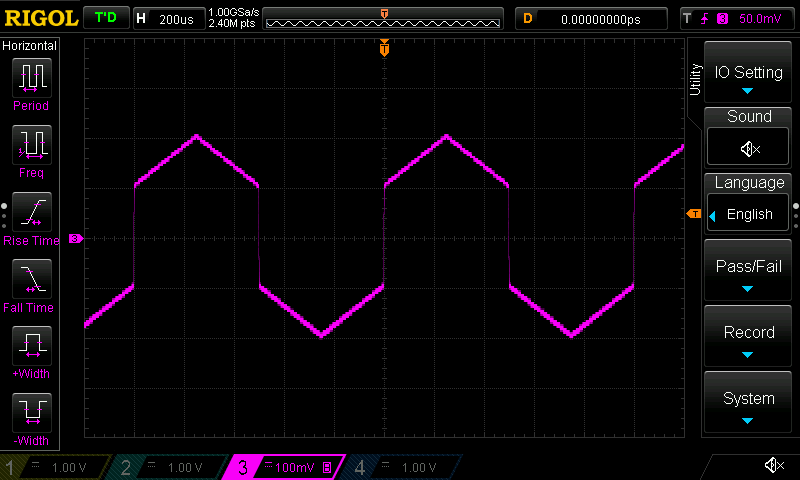

In [7]:
capture()

In [9]:
channel.abort()
scope.write('run')